In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 데이터 경로 변수

In [7]:
DATA_PATH = "/content/drive/MyDrive/the_datas/data/"
DATA_PATH

'/content/drive/MyDrive/the_datas/data/'

- 시드값

In [8]:

SEED = 42

- 데이터 불러오기

In [9]:
import pandas as pd
import numpy as np

train_tr = pd.read_csv(f"{DATA_PATH}train_tr_common_1.csv") # 학습용 구매기록 데이터
train_target = pd.read_csv(f"{DATA_PATH}store_train.csv") # 학습용 정답 데이터
test_tr = pd.read_csv(f"{DATA_PATH}test_tr_common_1.csv") # 테스트용 구매기록 데이터
submit = pd.read_csv(f"{DATA_PATH}store_submission.csv") # 제출 양식 데이터

train_tr.shape , train_target.shape , test_tr.shape , submit.shape

((523105, 12), (14940, 2), (441196, 12), (12225, 2))

- 공통 피처 파일 불러오기

In [10]:
train_ft = pd.read_csv(f"{DATA_PATH}train_common_3_주석없음.csv") # 학습 데이터(피처)
test_ft = pd.read_csv(f"{DATA_PATH}test_common_3_주석없음.csv") # 테스트 데이터(피처)

train_ft.shape , test_ft.shape

((14940, 932), (12225, 932))

# 확인용 코드

In [11]:
train_tr.loc[train_tr.groupby('ID')['구매가격'].idxmax()]

ID                 구매일시     지점코드      대분류      중분류  브랜드코드  \
299821     train_0  2004-11-23 13:10:00  A144000  남성정장스포츠     골프웨어   5452   
310328     train_1  2004-12-02 16:03:00  A112000    여성캐주얼  엘레강스캐주얼   5304   
422697    train_10  2005-02-25 12:40:00  A144000     잡화파트  수입종합화장품   5240   
158390   train_100  2004-08-14 16:10:00  A112000     가정용품   TV_VCR   5110   
418644  train_1000  2005-02-22 15:00:00  A373000     여성정장     타운웨어   5271   
...            ...                  ...      ...      ...      ...    ...   
120016  train_9995  2004-07-15 14:33:00  A112000     패션잡화  국내종합화장품   5128   
280863  train_9996  2004-11-08 16:03:00  A144000   여성의류파트    하이캐쥬얼   5271   
376135  train_9997  2005-01-14 18:44:00  A112000     영플라자     영캐주얼   5196   
384976  train_9998  2005-01-21 16:03:00  A112000     아동문화       아동   5254   
274438  train_9999  2004-11-04 14:54:00  A112000     가정용품       침대   6008   

           구매가격         구매일  구매월  구매요일  구매시간   수정_중분류  
299821  1236000  2004-11-23   11     1    13     골프웨어  
310328   698000  2004-12-02   12     3    16  엘레강스캐주얼  
422697   907000  2005-02-25    2     4    12  수입종합화장품  
158390   478000  2004-08-14    8     5    16       TV  
418644   324500  2005-02-22    2     1    15     타운웨어  
...         ...         ...  ...   ...   ...      ...  
120016    36000  2004-07-15    7     3    14    국내화장품  
280863  1980000  2004-11-08   11     0    16    하이캐쥬얼  
376135   154000  2005-01-14    1     4    18     영캐주얼  
384976   279000  2005-01-21    1     4    16       아동  
274438  2241630  2004-11-04   11     3    14       침대  

[14940 rows x 12 columns]

In [13]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.0 MB/s eta 0:00:00


In [15]:
import category_encoders as ce

# 원-핫 인코딩 수행
enc = ce.one_hot.OneHotEncoder()
tmp = enc.fit_transform(train_ft[["최대구매액_대분류"]])

# 각 컬럼별 원래 범주 확인
category_mapping = enc.category_mapping
for mapping in category_mapping:
    column = mapping['col']
    categories = mapping['mapping'].keys()
    print(f"Original categories for '{column}':")
    print(list(categories))


Original categories for '최대구매액_대분류':
['최대구매액_대분류_1', '최대구매액_대분류_2', '최대구매액_대분류_3', '최대구매액_대분류_4', '최대구매액_대분류_5', '최대구매액_대분류_6', '최대구매액_대분류_7', '최대구매액_대분류_8', '최대구매액_대분류_9', '최대구매액_대분류_10', '최대구매액_대분류_11', '최대구매액_대분류_12', '최대구매액_대분류_13', '최대구매액_대분류_14', '최대구매액_대분류_15', '최대구매액_대분류_16', '최대구매액_대분류_17', '최대구매액_대분류_18', '최대구매액_대분류_19', '최대구매액_대분류_20', '최대구매액_대분류_21', '최대구매액_대분류_22', '최대구매액_대분류_23', '최대구매액_대분류_24', '최대구매액_대분류_25', '최대구매액_대분류_26', '최대구매액_대분류_27', '최대구매액_대분류_28']


In [18]:
import pandas as pd

# 대분류 고유값 추출
unique_values = train_tr["대분류"].unique()

# 순서 번호 매기기
df_mapped = pd.DataFrame({
    "대분류": unique_values,
    "번호": range(1, len(unique_values) + 1)
})

# 결과 확인
print(df_mapped)


          대분류  번호
0       공산품파트   1
1        잡화파트   2
2         공산품   3
3      아동_스포츠   4
4        가정용품   5
5        아동문화   6
6   케주얼_구두_아동   7
7      스포츠캐쥬얼   8
8          아동   9
9        패션잡화  10
10      여성캐쥬얼  11
11      생식품파트  12
12    영어덜트캐쥬얼  13
13      로얄부띠끄  14
14        생식품  15
15    남성정장스포츠  16
16       명품잡화  17
17   골프_유니캐쥬얼  18
18       남성의류  19
19       여성정장  20
20         잡화  21
21     여성의류파트  22
22       영라이브  23
23      여성캐주얼  24
24       영플라자  25
25     가정용품파트  26
26       로얄부틱  27
27       영캐릭터  28


# 결측치 처리

In [ ]:
mask = train_ft.isnull().sum() > 0
train_ft.isnull().sum()[mask]

일별구매횟수표준편차      664
3회이상count      4214
총_생식품_구매가격     9711
평균_생식품_구매가격    1574
구매금액표준편차        388
구매금액왜도          840
구매금액첨도         1265
dtype: int64

In [ ]:

mask = test_ft.isnull().sum() > 0
test_ft.isnull().sum()[mask]

일별구매횟수표준편차      443
3회이상count      3284
총_생식품_구매가격     7820
평균_생식품_구매가격    1257
구매금액표준편차        242
구매금액왜도          599
구매금액첨도          954
dtype: int64

In [ ]:
train_ft["구매금액표준편차"] = train_ft["구매금액표준편차"].fillna(0)
train_ft["구매금액왜도"] = train_ft["구매금액왜도"].fillna(0)
train_ft["구매금액첨도"] = train_ft["구매금액첨도"].fillna(0)

test_ft["구매금액표준편차"] = test_ft["구매금액표준편차"].fillna(0)
test_ft["구매금액왜도"] = test_ft["구매금액왜도"].fillna(0)
test_ft["구매금액첨도"] = test_ft["구매금액첨도"].fillna(0)

In [ ]:
train_ft["총_생식품_구매가격"] = train_ft["총_생식품_구매가격"].fillna(0)
train_ft["평균_생식품_구매가격"] = train_ft["평균_생식품_구매가격"].fillna(0)
train_ft["3회이상count"] = train_ft["3회이상count"].fillna(0)


test_ft["총_생식품_구매가격"] = test_ft["총_생식품_구매가격"].fillna(0)
test_ft["평균_생식품_구매가격"] = test_ft["평균_생식품_구매가격"].fillna(0)
test_ft["3회이상count"] = test_ft["3회이상count"].fillna(0)


In [ ]:
train_ft["일별구매횟수표준편차"] = train_ft["일별구매횟수표준편차"].fillna(0)
test_ft["일별구매횟수표준편차"] = test_ft["일별구매횟수표준편차"].fillna(0)

In [ ]:
# train_ft["2004-05월_count_diff"] = train_ft["2004-05월_count_diff"].fillna(0)
# test_ft["2004-05월_count_diff"] = test_ft["2004-05월_count_diff"].fillna(0)

In [ ]:
# train_ft["월별_구매총액_변화비율_1_12"] = train_ft["월별_구매총액_변화비율_1_12"].fillna(0)
# test_ft["월별_구매총액_변화비율_1_12"] = test_ft["월별_구매총액_변화비율_1_12"].fillna(0)
# for i in range(1,12):
#     train_ft[f"월별_구매총액_변화_비율{i+1}_{i}"] = train_ft[f"월별_구매총액_변화_비율{i+1}_{i}"].fillna(0)
#     test_ft[f"월별_구매총액_변화_비율{i+1}_{i}"] = test_ft[f"월별_구매총액_변화_비율{i+1}_{i}"].fillna(0)

In [ ]:
train_ft.isnull().sum().sum(), test_ft.isnull().sum().sum()

(0, 0)

# 특성 공학(Feature Engineering)

- ID 변수 제외

In [ ]:
train_ft = train_ft.iloc[:,1:]
test_ft = test_ft.iloc[:,1:]
train_ft.shape, test_ft.shape

((14940, 478), (12225, 478))

- 추가 피처 만들어 보기

In [ ]:
cols = [ col for col in train_ft.columns if col.startswith("수정_중_pivot_횟수비율_") ]

In [ ]:
train_ft["수정_중분류별_구매횟수비율_std"] = train_ft[cols].std(axis=1)
train_ft["수정_중분류별_구매횟수비율_skew"] = train_ft[cols].skew(axis=1)
train_ft["수정_중분류별_구매횟수비율_kurt"] = train_ft[cols].kurt(axis=1)

test_ft["수정_중분류별_구매횟수비율_std"] = test_ft[cols].std(axis=1)
test_ft["수정_중분류별_구매횟수비율_skew"] = test_ft[cols].skew(axis=1)
test_ft["수정_중분류별_구매횟수비율_kurt"] = test_ft[cols].kurt(axis=1)

train_ft.shape, test_ft.shape

((14940, 481), (12225, 481))

## Feature Encoding

In [ ]:
train_ft.shape, test_ft.shape

((14940, 481), (12225, 481))

In [ ]:
cols = train_ft.select_dtypes("object").columns.tolist()
train_ft[cols].nunique()

주구매지점           4
주구매_수정_중분류    246
주구매_대분류        28
최대구매액_대분류      28
최소구매액_대분류      28
dtype: int64

In [ ]:
%pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
enc = ce.one_hot.OneHotEncoder()
tmp = enc.fit_transform(train_ft[["주구매지점","주구매_대분류", "최소구매액_대분류", "최대구매액_대분류"]])
train_ft = pd.concat([train_ft,tmp],axis =1)

tmp = enc.transform(test_ft[["주구매지점","주구매_대분류", "최소구매액_대분류", "최대구매액_대분류"]])
test_ft = pd.concat([test_ft,tmp],axis =1)

train_ft.shape, test_ft.shape

((14940, 569), (12225, 569))

In [ ]:
enc = ce.count.CountEncoder()
train_ft["주구매_수정_중분류_cnt"] = enc.fit_transform(train_ft[["주구매_수정_중분류"]])
test_ft["주구매_수정_중분류_cnt"] = enc.transform(test_ft[["주구매_수정_중분류"]])

train_ft.shape, test_ft.shape

((14940, 570), (12225, 570))

- 문자열 피처 삭제

In [ ]:
cols

['주구매지점', '주구매_수정_중분류', '주구매_대분류', '최대구매액_대분류', '최소구매액_대분류']

In [ ]:
train_ft = train_ft.drop(columns=cols)
test_ft = test_ft.drop(columns=cols)
train_ft.shape, test_ft.shape

((14940, 565), (12225, 565))

In [ ]:
train_ft.select_dtypes("object").columns , test_ft.select_dtypes("object").columns

(Index([], dtype='object'), Index([], dtype='object'))

## Inf 값 처리

In [ ]:
mask = np.isinf(train_ft).sum() > 0
np.isinf(train_ft).sum()[mask]

Series([], dtype: int64)

In [ ]:
mask = np.isinf(test_ft).sum() > 0
np.isinf(test_ft).sum()[mask]

Series([], dtype: int64)

In [ ]:
cols = np.isinf(train_ft).sum()[mask].index
cols

Index([], dtype='object')

In [ ]:
# train_inf = train_ft[cols].copy()
# train_inf[np.isinf(train_inf)] = np.nan  # 무한대를 NaN으로 대체
# train_inf = np.nan_to_num(train_inf, nan=np.nanmax(train_inf[~np.isinf(train_inf)]))
# np.isinf(train_inf).sum().sum()

In [ ]:
# test_inf = test_ft[cols].copy()
# test_inf[np.isinf(test_inf)] = np.nan  # 무한대를 NaN으로 대체
# test_inf = np.nan_to_num(test_inf, nan=np.nanmax(test_inf[~np.isinf(test_inf)]))
# np.isinf(test_inf).sum().sum()

In [ ]:
# train_ft[cols] = train_inf
# test_ft[cols] = test_inf


In [ ]:
np.isinf(train_ft).sum().sum(), np.isinf(test_ft).sum().sum()

(0, 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
train_ft[train_ft.columns] = scaler.fit_transform(train_ft)
test_ft[test_ft.columns] = scaler.transform(test_ft)
train_ft.head()

거래횟수      내점일수      구매주기    봄_구매비율   여름_구매비율   가을_구매비율   겨울_구매비율  \
0 -0.437126 -0.369867  0.002987 -1.029777  0.001191  0.838272  0.338186   
1  0.239394  0.144110 -0.356452  0.323951 -0.390607  0.620171 -0.552996   
2  1.890101  1.943028 -0.869935  0.798943 -0.514333 -0.304527 -0.059266   
3  4.298510  3.793345 -1.023980  0.420933 -0.327474  0.008592 -0.135636   
4  0.618244  0.452496 -0.613193 -0.752532  1.707410 -0.130285 -0.821561   

      주구매요일  일별평균구매건수     거래개월수  ...  최대구매액_대분류_20  최대구매액_대분류_21  \
0  0.109631 -0.057297  0.017620  ...     -0.131248      -0.07785   
1  0.109631  0.222706  1.176010  ...     -0.131248      -0.07785   
2 -1.643370  0.277707  1.465608  ...     -0.131248      -0.07785   
3  0.109631  0.674668  1.465608  ...     -0.131248      -0.07785   
4  0.693965  0.679008  0.886413  ...     -0.131248      -0.07785   

   최대구매액_대분류_22  최대구매액_대분류_23  최대구매액_대분류_24  최대구매액_대분류_25  최대구매액_대분류_26  \
0       -0.1402     -0.200973     -0.090737     -0.071977     -0.146044   
1       -0.1402     -0.200973     -0.090737     -0.071977     -0.146044   
2       -0.1402     -0.200973     -0.090737     -0.071977     -0.146044   
3       -0.1402     -0.200973     -0.090737     -0.071977     -0.146044   
4       -0.1402     -0.200973     -0.090737     -0.071977     -0.146044   

   최대구매액_대분류_27  최대구매액_대분류_28  주구매_수정_중분류_cnt  
0     -0.067118     -0.050497       -0.726970  
1     -0.067118     -0.050497       -0.510078  
2     -0.067118     -0.050497       -0.848408  
3     -0.067118     -0.050497        1.523851  
4     -0.067118     -0.050497       -0.833157  

[5 rows x 565 columns]

# 정답 데이터

In [ ]:
target = train_target["target"]
target

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
14935    0.0
14936    0.0
14937    0.0
14938    1.0
14939    1.0
Name: target, Length: 14940, dtype: float64

# cv 점수 확인해보기

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(n_splits=5,shuffle=True, random_state=SEED)

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

0.7149713264621779

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=SEED)
scores = cross_val_score(model,train_ft,target,cv = cv ,scoring='f1_macro',n_jobs = -1)
np.mean(scores)

0.7048321343992794

# 모델 학습

In [ ]:
model = LGBMClassifier(random_state=SEED)
model.fit(train_ft,target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5874, number of negative: 9066
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57801
[LightGBM] [Info] Number of data points in the train set: 14940, number of used features: 545
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393173 -> initscore=-0.433995
[LightGBM] [Info] Start training from score -0.433995


LGBMClassifier(random_state=42)

In [ ]:
pip install shap

In [ ]:
import matplotlib
from matplotlib import font_manager

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv

fontpaths = ["/usr/share/fonts/truetype/nanum/"]
font_files = font_manager.findSystemFonts(fontpaths=fontpaths)

for ff in font_files:
    font_manager.fontManager.addfont(ff)

matplotlib.rc('font', family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and direc

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(test_ft)

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


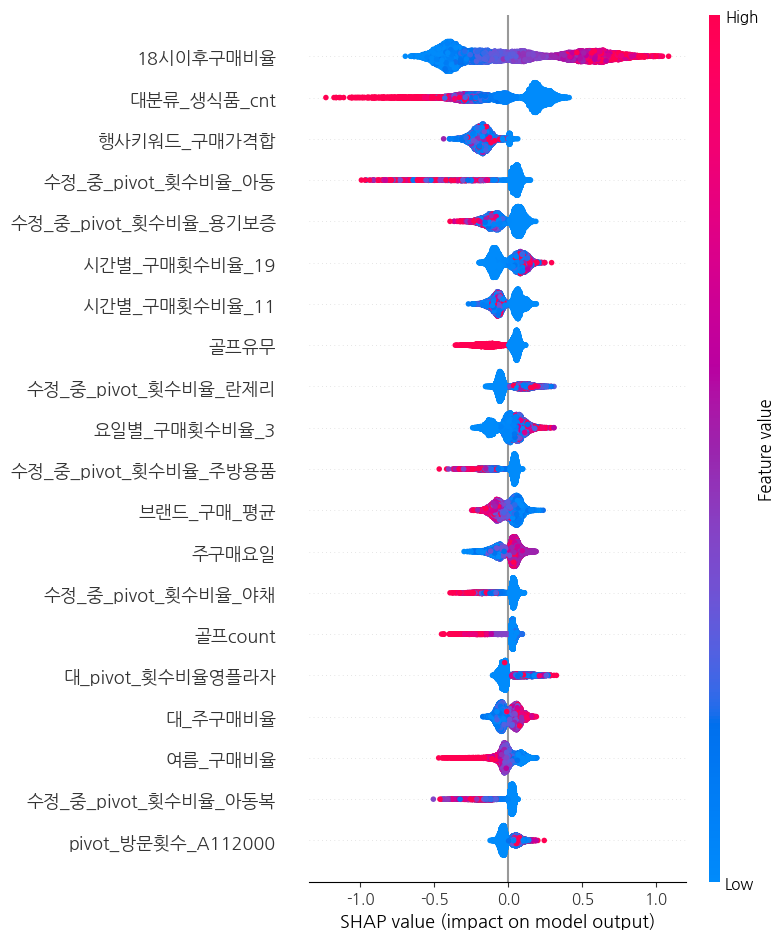

In [ ]:
shap.summary_plot(shap_values, test_ft)

# 테스트 데이터 예측

In [ ]:
pred = model.predict(test_ft)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# pred_proba = model.predict_proba(test_ft)[:,1]
# pred_proba

# 평가를 위한 제출 파일 생성
- 예측 결과를 target 컬럼에 넣어 csv 파일로 저장후에 제출한다.

In [ ]:
submit

ID  target
0          test_0     0.0
1          test_1     0.0
2          test_2     0.0
3          test_3     1.0
4          test_4     1.0
...           ...     ...
12220  test_12220     1.0
12221  test_12221     0.0
12222  test_12222     0.0
12223  test_12223     0.0
12224  test_12224     0.0

[12225 rows x 2 columns]

In [ ]:
submit["target"] = pred
submit

ID  target
0          test_0     0.0
1          test_1     0.0
2          test_2     0.0
3          test_3     1.0
4          test_4     1.0
...           ...     ...
12220  test_12220     1.0
12221  test_12221     0.0
12222  test_12222     0.0
12223  test_12223     0.0
12224  test_12224     0.0

[12225 rows x 2 columns]

- 예측 결과를 csv 파일로 저장하여 제출

In [ ]:
submit.to_csv(f"{DATA_PATH}submit_6_기준_중분류만.csv",index=False)